In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib

In [183]:
#read the data-1
df2 = pd.read_csv("./data/modified.csv", index_col=False)

In [184]:
len(df2.columns)

11

In [185]:
#divide into features and target
x2 = df2.iloc[:, df2.columns != 'output']
y2 = df2['output']

In [186]:
df2.head()

,age,sex,cp,fbs,restecg,slp,thall,output,scaled_trtbps,scaled_chol,scaled_thalachh
0,63,1,3,1,0,0,1,1,-0.037736,-0.511416,0.206107
1,37,1,2,0,1,0,2,1,-0.320755,-0.433790,0.770992
2,41,0,1,0,0,2,2,1,-0.320755,-0.643836,0.541985
3,56,1,1,0,1,2,2,1,-0.509434,-0.497717,0.633588
4,57,0,0,0,1,2,2,1,-0.509434,0.041096,0.404580


In [187]:
#split the data-1 
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.1, random_state=0)

In [188]:
#shape of train and test data
print("-----------data-1------------")
print(f'X-train-2 : {X_train2.shape}  :  Y_train-2 : {y_train2.shape}')
print(f'X-test-2 : {X_test2.shape}  :  Y_test-2 : {y_test2.shape}\n')

-----------data-1------------
X-train-2 : (272, 10)  :  Y_train-2 : (272,)
X-test-2 : (31, 10)  :  Y_test-2 : (31,)



In [199]:
X_train2.head()

,age,sex,cp,fbs,restecg,slp,thall,scaled_trtbps,scaled_chol,scaled_thalachh
255,45,1,0,0,0,1,3,-0.094340,-0.164384,0.160305
134,41,0,1,0,1,2,2,-0.396226,-0.178082,0.404580
8,52,1,2,1,1,2,3,0.471698,-0.666667,0.389313
157,35,1,1,0,1,2,2,-0.471698,-0.698630,0.572519
241,59,0,0,0,1,1,2,0.509434,-0.438356,0.099237


In [189]:
clf = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,criterion='entropy',random_state=0)
clf.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10,
                       random_state=0)

In [190]:
#Random Classifier
Rclf = RandomForestClassifier(max_depth=4, max_leaf_nodes=15, random_state=0)
Rclf.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=4, max_leaf_nodes=15, random_state=0)

In [191]:
#logistic Regression 
lg = LogisticRegression(C=1,random_state=0)
lg.fit(X_train2, y_train2)

c:\Users\Dark-Devil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, random_state=0)

### Prediction

In [192]:
clf_prediction1 = clf.predict(X_test2)
rclf_prediction1 = Rclf.predict(X_test2)
lg_prediction1 = lg.predict(X_test2)

### Accuracy 

In [193]:
#accuracy of each model
print("DecisionTreeClassifier Score: ",accuracy_score(y_test2,clf_prediction1))
print("RandomClassifier Score: ",accuracy_score(y_test2, rclf_prediction1))
print("LogisticRegression Score: ",accuracy_score(y_test2, lg_prediction1))

DecisionTreeClassifier Score:  0.8709677419354839
RandomClassifier Score:  0.8709677419354839
LogisticRegression Score:  0.7741935483870968


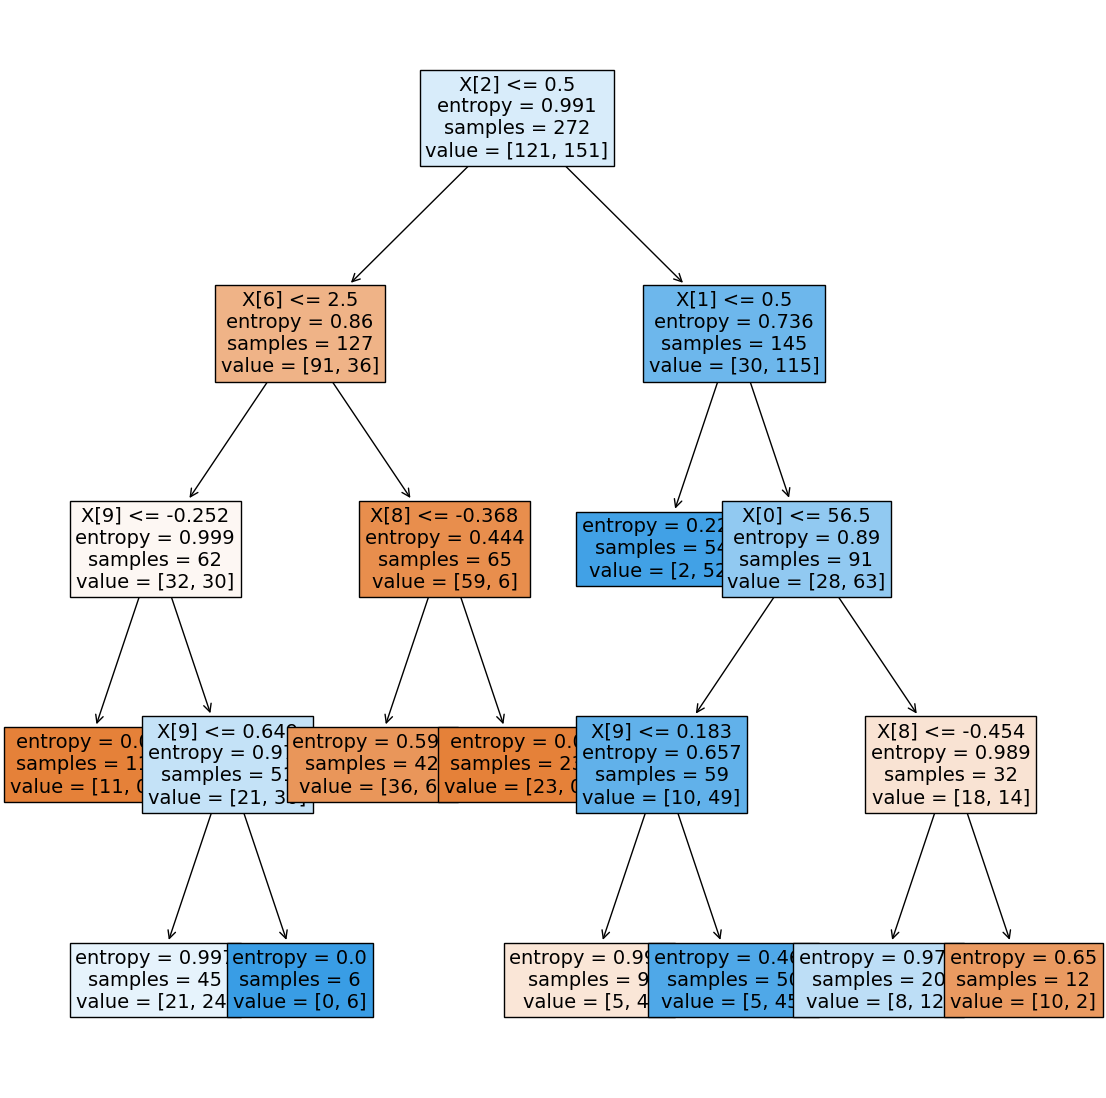

In [194]:
#View of DecisionTree
plt.figure(figsize=(14,14))
tree.plot_tree(clf,fontsize=(14),filled=True)
plt.show()

### Save the model

In [200]:
joblib.dump(clf, "./models/dst_for_attack.pkl")

['./models/dst_for_attack.pkl']

In [196]:
#function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

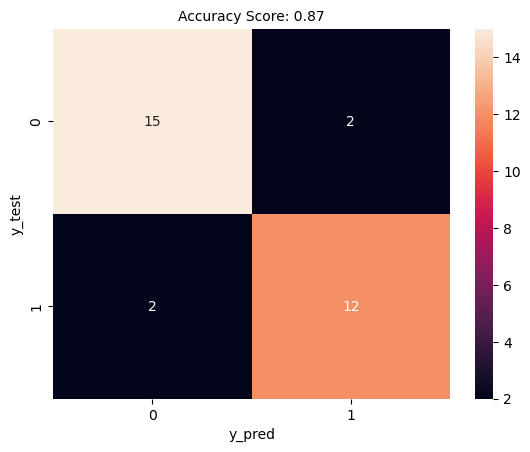

In [197]:
plot_confusion_matrix(y_test2, clf_prediction1)

In [198]:
#classification report of decision tree

print(classification_report(y_test2, lg_prediction1))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.77      0.71      0.74        14

    accuracy                           0.77        31
   macro avg       0.77      0.77      0.77        31
weighted avg       0.77      0.77      0.77        31

